 ## Вычисление и визуализация морфологического спектра

In [1]:
from scipy.ndimage import morphology
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

В качестве структурных элементов использовать будем квадраты $2r+1$ на $2r+1$.

In [2]:
def get_struct_of_radius(r):
    return np.ones((2*r+1, 2*r+1))

Реализация вычисления спектра для бинарных изображений, основывается на бинарных операциях и операциях над множествами.

In [3]:
def bin_compute_positive_range(image):
    ps = []
    left = morphology.binary_opening(image, get_struct_of_radius(0))
    right = morphology.binary_opening(image, get_struct_of_radius(1))
    result = np.logical_and(left, np.logical_not(right))
    ps.append(result.sum())
    r = 1
    while morphology.binary_erosion(image, get_struct_of_radius(r-1)).any():
        left = morphology.binary_opening(image, get_struct_of_radius(r))
        right = morphology.binary_opening(image, get_struct_of_radius(r+1))
        result = np.logical_and(left, np.logical_not(right))
        ps.append(result.sum())
        r += 1
    return ps

def bin_compute_negative_range(image):
    ps = []
    left = morphology.binary_closing(image, get_struct_of_radius(1))
    right = morphology.binary_closing(image, get_struct_of_radius(0))
    result = np.logical_and(left, np.logical_not(right))
    ps.append(result.sum())
    r = 2
    while result.any():
        left = morphology.binary_closing(image, get_struct_of_radius(r))
        right = morphology.binary_closing(image, get_struct_of_radius(r-1))
        result = np.logical_and(left, np.logical_not(right))
        ps.append(result.sum())
        r += 1
    return list(reversed(ps))

def bin_compute_spectrum(image):
    pos = bin_compute_positive_range(image)
    neg = bin_compute_negative_range(image)
    res = neg + pos
    K = len(neg)
    N = len(pos)
    return res, N, K

Уменьшим картинку для быстродействия

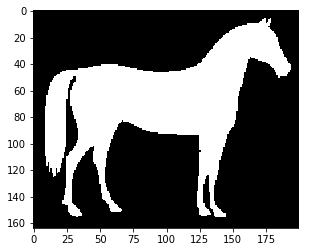

In [4]:
from skimage import data
from skimage import transform

horse = np.logical_not(transform.rescale(data.horse(), 0.5, mode='reflect'))

plt.imshow(horse, cmap='gray')

In [5]:
%%time
res, N, K = bin_compute_spectrum(horse)

CPU times: user 5.03 s, sys: 517 ms, total: 5.55 s
Wall time: 5.83 s


<Container object of 44 artists>

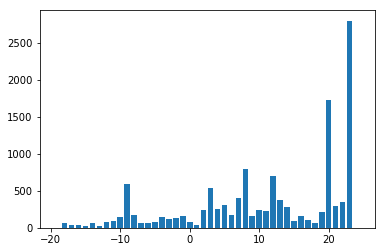

In [6]:
plt.bar(np.arange(-K+1, N+1), res)

Теперь реализуем для полутоновых. Все операции отмыкания и замыкания теперь не бинарные, а вместо разности множеств берем честную разность.

In [7]:
from skimage.morphology import opening, closing

def compute_positive_range(image):
    ps = []
    left = opening(image, get_struct_of_radius(0))
    right = opening(image, get_struct_of_radius(1))
    result = left - right
    ps.append(result.sum())
    r = 1
    while result.any():
        left = opening(image, get_struct_of_radius(r))
        right = opening(image, get_struct_of_radius(r+1))
        result = left - right
        ps.append(result.sum())
        r += 1
    return ps

def compute_negative_range(image):
    ps = []
    left = closing(image, get_struct_of_radius(1))
    right = closing(image, get_struct_of_radius(0))
    result = left - right
    ps.append(result.sum())
    r = 2
    while result.any():
        left = closing(image, get_struct_of_radius(r))
        right = closing(image, get_struct_of_radius(r-1))
        result = left - right
        ps.append(result.sum())
        r += 1
    return list(reversed(ps))

def compute_spectrum(image):
    pos = compute_positive_range(image)
    neg = compute_negative_range(image)
    res = neg + pos
    K = len(neg)
    N = len(pos)
    return res, N, K

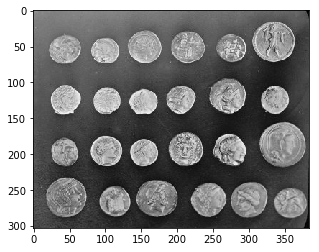

In [8]:
coins = data.coins()

plt.imshow(coins, cmap='gray')

In [9]:
%%time
res, N, K = compute_spectrum(coins)

CPU times: user 2.24 s, sys: 55.7 ms, total: 2.29 s
Wall time: 2.44 s


<Container object of 151 artists>

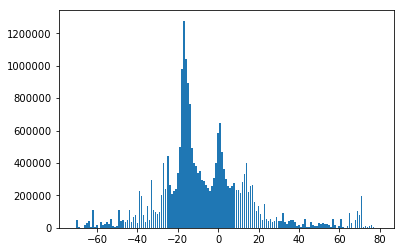

In [10]:
plt.bar(np.arange(-K+1, N+1), res)